In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
import pytorch_lightning as pl
from torch import nn
import math
from itertools import product

import os, sys
sys.path.append(os.path.join(os.getcwd(), '../symlie'))
sys.path.append(os.path.join(os.getcwd(), '../sympde/viz'))
sys.path.append(os.path.join(os.getcwd(), '../sympde/misc'))

from run import parse_options, main

from data.dataset import MnistDataset
from model.networks.linear import MyLinear
from model.networks.mlp import MLP

from general_plots import imshows, plot_vals, simple_imshow
from equiv import assert_equiv

plt.rcParams['image.cmap'] = 'viridis'


/Users/elias/anaconda3/envs/sympde/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
seeds = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
transform_types = ['space_translation', 'none']
do_return = False

seeds = [1,2,3]
transform_types = ['space_translation']
do_return = False

for transform_type in transform_types:
    for seed in seeds:

        args = parse_options(notebook=True)
        args.train = True
        args.persistent_workers = True

        args.data_dir = '../data/flat'
        args.net = 'LinearPw'
        args.batch_size = 2

        args.do_return = do_return

        args.seed = seed
        args.transform_type = transform_type

        args.max_epochs = 10

        args.version = 'v1'

        # args.linearmodules = ['MyLinear', 'MyLinear']
        args.linearmodules = ['MyLinear', 'nn.Linear']
        args.linearmodules = ['MyLinearPw', 'nn.Linear']
        args.bias = False

        args.dim = 4
        # args.n_splits = [100, 100, 100]

        # Training
        model, trainer, datamodule = main(args)

x, eps = batch = next(iter(datamodule.test_dataloader()))
# imgs, transf         = next(iter(datamodule.test_dataloader()))

# datamodule.test_dataloader()

Seed set to 1
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name      | Type       | Params
-----------------------------------------
0 | net       | MyLinearPw | 528   
1 | criterion | MSELoss    | 0     
-----------------------------------------
528       Trainable params
0         Non-trainable params
528       Total params
0.002     Total estimated model params size (MB)




###	Version:  v1 	###
###	Name:  symlie_dataflat_netLinearPw_transformspace_translation_seed1 	###


Epoch 9: 100%|██████████| 200/200 [00:01<00:00, 156.47it/s, v_num=v1, train_loss=9.23e-14, val_loss=2.32e-14]

`Trainer.fit` stopped: `max_epochs=10` reached.


Testing DataLoader 0: 100%|██████████| 1000/1000 [00:01<00:00, 970.89it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │   2.256644171657815e-14   │
└───────────────────────────┴───────────────────────────┘

Seed set to 2
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name      | Type       | Params
-----------------------------------------
0 | net       | MyLinearPw | 528   
1 | criterion | MSELoss    | 0     
-----------------------------------------
528       Trainable params
0         Non-trainable params
528       Total params
0.002     Total estimated model params size (MB)




###	Version:  v1 	###
###	Name:  symlie_dataflat_netLinearPw_transformspace_translation_seed2 	###


Epoch 9: 100%|██████████| 200/200 [00:01<00:00, 159.87it/s, v_num=v1, train_loss=3.45e-13, val_loss=7.82e-13]

`Trainer.fit` stopped: `max_epochs=10` reached.


Testing DataLoader 0: 100%|██████████| 1000/1000 [00:01<00:00, 968.30it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │   7.665498552751615e-13   │
└───────────────────────────┴───────────────────────────┘

Seed set to 3
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name      | Type       | Params
-----------------------------------------
0 | net       | MyLinearPw | 528   
1 | criterion | MSELoss    | 0     
-----------------------------------------
528       Trainable params
0         Non-trainable params
528       Total params
0.002     Total estimated model params size (MB)




###	Version:  v1 	###
###	Name:  symlie_dataflat_netLinearPw_transformspace_translation_seed3 	###


Epoch 9: 100%|██████████| 200/200 [00:01<00:00, 158.73it/s, v_num=v1, train_loss=6.28e-14, val_loss=2.11e-13]

`Trainer.fit` stopped: `max_epochs=10` reached.


Testing DataLoader 0: 100%|██████████| 1000/1000 [00:01<00:00, 995.92it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │  1.9292250089120166e-13   │
└───────────────────────────┴───────────────────────────┘

In [16]:
w_index_hat = model.net.w_index.data.clone()


In [14]:
w_index_none = model.net.get_w_index_none(size = args.dim)
w_index_untrained = model.net.get_w_index_train(size = args.dim)

In [21]:
model.net.w_index.data = w_index_untrained

out_a, out_b = model(batch)
print('Output NOT allclose!' if not torch.allclose(out_a, out_b) else 'pass')
out_a, out_b

Output NOT allclose!


(tensor([[-0.0339,  0.0473,  0.0362,  0.0167],
         [ 0.0066, -0.1030, -0.0219, -0.0626]], grad_fn=<StackBackward0>),
 tensor([[-0.0592, -0.0287,  0.0127,  0.0978],
         [-0.1671,  0.0060, -0.1739, -0.1277]], grad_fn=<SqueezeBackward1>))

In [26]:
split_dir = os.path.join(args.data_dir, 'train')
np.load(os.path.join(split_dir, 'randn.npy')).shape

(10000, 4)

In [111]:
n_split = 50000
space_length = 100
eps = 1.

x = np.linspace(0, 1, space_length)
y = np.random.uniform(0.5, 2., n_split)

x_y = x.reshape(-1, 1) * y

sins = np.sin(2*math.pi*x_y).T

noise = np.random.normal(0, eps, size = (n_split, space_length))

sins_noised = sins + noise

# plt.plot(x, sins.T, alpha = 1.)
# plt.plot(x, sins_noised.T, alpha = 1.)
# plt.show()

In [51]:
x = np.linspace(0, 1, 100)
x = np.stack([x, x])
print(x.shape)
sin = np.sin(2*math.pi*2.*x)
print(sin.shape)

(2, 100)
(2, 100)


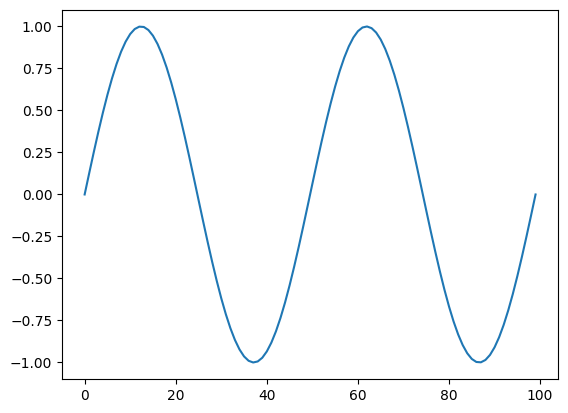

In [38]:
x = np.linspace(0, 1, 100)
sin = np.sin(2*math.pi*2.*x)
plt.plot( np.sin(2*math.pi*2.*x) )

In [22]:
w_index

NameError: name 'w_index' is not defined

In [15]:
# size = args.dim
# weight = torch.randn(size, size)
# plt.imshow(weight)

# weight = (w_index_hat @ weight.flatten()).reshape(weight.shape)
# plt.imshow(weight)



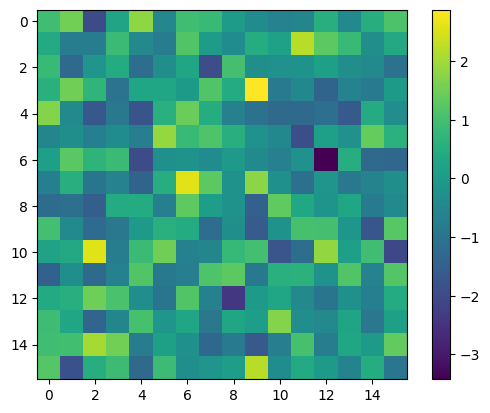

In [35]:
w_index_hat = model.net.w_index.data.clone()
plt.imshow(w_index_hat)
plt.colorbar()
plt.show()

In [12]:
linear.in_features

3

In [26]:
indices_zero = torch.sum(w, dim = 1) == 0
indices_zero

tensor([False,  True,  True,  True, False,  True,  True,  True, False])

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [60]:
torch.linalg.norm(w, ord = 1, dim = 1)

tensor([0.0000, 2.5632, 2.3075, 2.6068, 2.2231, 2.5968, 2.7758, 2.7193, 2.4914])

In [57]:
w

tensor([[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000],
        [-0.5043, -0.1885,  0.3271, -0.2067,  0.0556, -0.0126,  0.3660,  0.3615,
         -0.5408],
        [ 0.1576,  0.3226, -0.4148,  0.3273, -0.1165, -0.0643,  0.0184,  0.7441,
         -0.1418],
        [ 0.1867,  0.0029, -0.3039,  0.2053, -0.4887,  0.4414, -0.0979,  0.4510,
          0.4288],
        [-0.6231,  0.1119, -0.5498, -0.1453, -0.0574, -0.1374,  0.0680,  0.0322,
         -0.4979],
        [ 0.3480, -0.2841, -0.0216, -0.2381, -0.5121,  0.2962, -0.3979,  0.0167,
          0.4821],
        [ 0.3767,  0.2033,  0.3945,  0.2382, -0.1843,  0.1880, -0.4374, -0.2035,
          0.5499],
        [-0.4090,  0.0028,  0.3645,  0.2141,  0.2889,  0.2144,  0.2888,  0.5027,
          0.4341],
        [ 0.1693, -0.0258,  0.2231, -0.4494, -0.6545,  0.4173, -0.2818,  0.1510,
         -0.1194]])

In [83]:
(torch.sum(w, dim = 1).isin([0., 1.])).all()

AttributeError: 'Tensor' object has no attribute 'isin'

True

In [76]:
w = linear.w_index
w = torch.randn(9, 9)
w[0, :] = 0
print(w)

indices_zero = torch.sum(w, dim = 1) == 0
print(indices_zero)

w = torch.abs(w)

w[~indices_zero] /= torch.linalg.norm(w[~indices_zero], ord = 1, dim=1).reshape(-1, 1)

w

tensor([[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000],
        [ 1.4569,  0.9031,  0.5410, -0.9038,  0.3467,  0.3771,  0.7256,  0.1439,
         -1.0054],
        [ 0.8452, -0.6604,  1.2184,  1.3345, -0.8592,  2.2258, -0.8378, -2.2101,
         -0.5632],
        [-0.4884, -0.5343, -1.1174, -0.5122,  1.4471,  0.3192, -0.9954,  1.9367,
          0.3178],
        [ 0.6802, -0.4516,  1.2370,  0.2414, -0.4421,  1.0781,  0.3091,  0.9408,
          0.9335],
        [-0.2699,  1.2473, -0.9052, -0.3257, -0.2257,  1.4649, -0.5073,  0.7774,
          0.3405],
        [-0.8805,  0.8389,  0.7467, -0.2643, -1.3776,  0.4585,  0.6323,  0.4860,
          0.0216],
        [ 0.9447, -0.9951,  0.3207,  0.5392,  0.9942,  1.2037, -0.6757,  1.3401,
         -1.0133],
        [-0.8158,  0.0620, -0.0977, -0.2509,  0.5929, -0.2549, -0.9946,  1.3329,
          1.0815]])
tensor([ True, False, False, False, False, False, False, False, False])


tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2275, 0.1410, 0.0845, 0.1411, 0.0541, 0.0589, 0.1133, 0.0225, 0.1570],
        [0.0786, 0.0614, 0.1133, 0.1241, 0.0799, 0.2070, 0.0779, 0.2055, 0.0524],
        [0.0637, 0.0697, 0.1457, 0.0668, 0.1887, 0.0416, 0.1298, 0.2526, 0.0414],
        [0.1077, 0.0715, 0.1959, 0.0382, 0.0700, 0.1708, 0.0490, 0.1490, 0.1478],
        [0.0445, 0.2057, 0.1493, 0.0537, 0.0372, 0.2416, 0.0837, 0.1282, 0.0561],
        [0.1543, 0.1470, 0.1309, 0.0463, 0.2414, 0.0803, 0.1108, 0.0852, 0.0038],
        [0.1177, 0.1240, 0.0400, 0.0672, 0.1239, 0.1500, 0.0842, 0.1670, 0.1262],
        [0.1488, 0.0113, 0.0178, 0.0458, 0.1081, 0.0465, 0.1814, 0.2431, 0.1972]])

In [78]:
w[1].sum()

tensor(1.)

In [13]:
linear.get_w_index_kernelconv(size = linear.out_features)

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [14]:
linear.w_index_param.data

tensor([[ 1.9437,  0.9387,  0.2648, -0.8008,  0.3755, -0.1700,  0.4489,  0.6473,
         -0.7958],
        [ 1.5887, -1.5875, -0.6345,  0.6519, -1.3103,  1.8011, -0.9562, -1.3809,
         -0.1477],
        [ 1.5924, -0.4786, -0.3314, -1.1735, -0.7365,  0.5320,  1.0343,  0.2972,
          0.5447],
        [-1.2267,  1.6075, -1.1517,  0.7555, -0.6666,  1.2391,  0.2612,  0.8609,
         -1.0079],
        [ 0.2578,  2.0466, -0.6811,  0.9115,  0.0544, -0.0755,  0.7999, -0.3039,
         -0.6900],
        [ 1.0410, -1.1499, -0.1272,  0.3794, -0.8496,  0.3060,  0.0850,  0.9101,
         -1.9523],
        [ 0.9402,  0.4649, -0.7502, -0.2891, -0.0708,  0.0069,  0.2617, -0.6611,
          0.7149],
        [ 0.2220,  0.6658, -0.3314, -0.3986, -0.2230,  1.0358, -2.6043, -0.7401,
         -0.6743],
        [ 1.8350, -0.2753,  0.8459,  0.1697,  0.4407,  0.1876,  0.6560,  0.8600,
          0.0956],
        [ 0.1289, -1.1056,  1.5149,  0.0882,  2.1579,  0.5164, -0.7490, -1.8674,
          0.2288]])

In [244]:
indices = torch.max(linear.w_index_param, dim = 1).indices
indices = torch.where(indices < 9, indices, 0)
indices

tensor([0, 5, 0, 1, 1, 0, 0, 5, 0, 4])

In [242]:
linear.w_index.flatten()

tensor([ 0, -1, -1, -1,  1, -1, -1, -1,  2])

In [236]:
sf = torch.softmax(linear.w_index_param.data, dim = 1)
sf

tensor([[0.3987, 0.1459, 0.0744, 0.0256, 0.0831, 0.0482, 0.0894, 0.1090, 0.0258],
        [0.3185, 0.0133, 0.0345, 0.1248, 0.0175, 0.3939, 0.0250, 0.0163, 0.0561],
        [0.3361, 0.0424, 0.0491, 0.0211, 0.0327, 0.1164, 0.1923, 0.0920, 0.1179],
        [0.0187, 0.3174, 0.0201, 0.1354, 0.0327, 0.2196, 0.0826, 0.1504, 0.0232],
        [0.0740, 0.4429, 0.0290, 0.1424, 0.0604, 0.0531, 0.1273, 0.0422, 0.0287],
        [0.2577, 0.0288, 0.0801, 0.1330, 0.0389, 0.1235, 0.0991, 0.2260, 0.0129],
        [0.2292, 0.1425, 0.0423, 0.0670, 0.0834, 0.0901, 0.1163, 0.0462, 0.1830],
        [0.1348, 0.2101, 0.0775, 0.0725, 0.0864, 0.3042, 0.0080, 0.0515, 0.0550],
        [0.3352, 0.0406, 0.1247, 0.0634, 0.0831, 0.0645, 0.1031, 0.1264, 0.0589],
        [0.0589, 0.0171, 0.2354, 0.0565, 0.4478, 0.0867, 0.0245, 0.0080, 0.0651]])

In [239]:
linear.weight

tensor([[ 0.0447,  1.9112, -0.2310],
        [ 0.3102, -0.4934,  0.4126],
        [ 0.4036,  0.0120, -0.0465]])

In [238]:
sf[0].sum()

tensor(1.)

In [219]:
w_index = model.net.linear.w_index.flatten()
w_index

tensor([ 0, -1, -1, -1,  1, -1, -1, -1,  2])

In [216]:
torch.randn((10, 9))

tensor([[ 0.9184,  2.5031, -0.8849, -0.4575, -1.2465, -0.3725, -0.4342,  0.7152,
          0.6677],
        [ 2.1391,  0.7189, -0.1221,  0.2099, -0.1981, -0.0669, -0.4107,  0.9719,
         -0.3177],
        [ 1.2135,  1.0827,  0.7111,  0.6518,  2.1633,  1.0785, -0.8343, -1.1950,
         -0.1263],
        [-0.5063,  0.7701,  0.8414,  0.8662,  0.3357,  0.9661,  0.4090, -1.0189,
         -0.0380],
        [-1.6249, -2.0253,  1.4938,  0.9564,  0.1694,  0.5165,  0.8744, -0.6767,
         -0.8599],
        [-2.5896,  0.5615, -1.0827,  0.2161, -1.5832,  0.6927, -0.6728, -1.7417,
         -0.0074],
        [ 0.3152, -0.1824,  0.5094,  0.2335, -1.7168, -0.9226,  0.4456,  1.5743,
         -1.0815],
        [-0.0720,  0.2181,  1.4593,  0.9006, -1.9259,  0.2857, -0.0454,  0.6748,
          0.5903],
        [ 1.8398,  0.1364, -0.3279, -0.2093,  0.7092, -0.4315,  0.0051, -0.8739,
         -0.7502],
        [ 0.4851,  0.1883, -0.3489, -1.9522, -1.8613,  0.1918,  1.7987,  0.4927,
         -1.1416]])

In [32]:
o2, = zip(*o)
torch.stack(o2)

ValueError: too many values to unpack (expected 1)

In [8]:
torch.rand((1,))

tensor([0.2633])

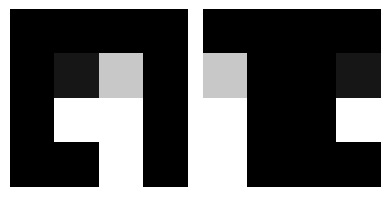

In [89]:
x, y = dataset[0]
x_aug, y_aug = dataset_aug[0]

imshows([x, x_aug], axis_off = True, imshow_kwargs={'cmap': 'gray'})

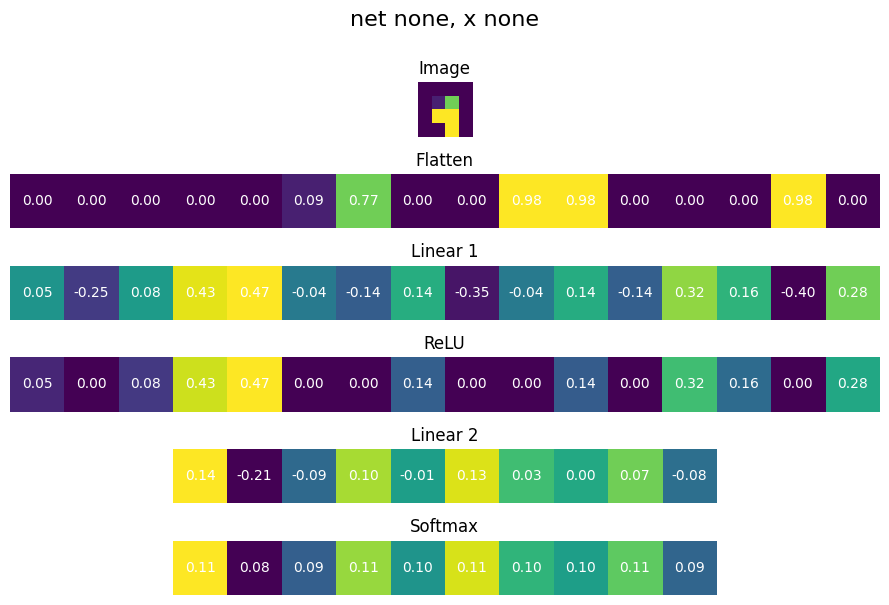

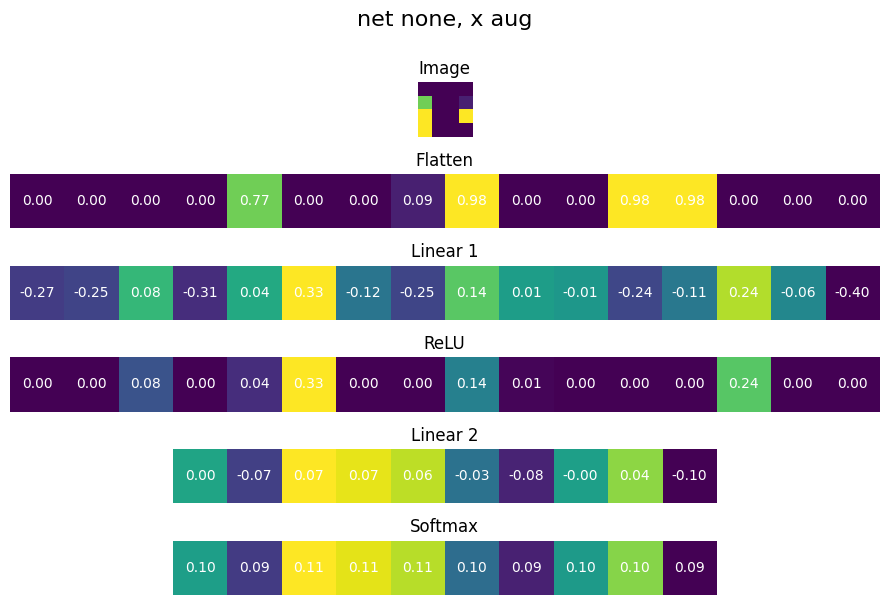

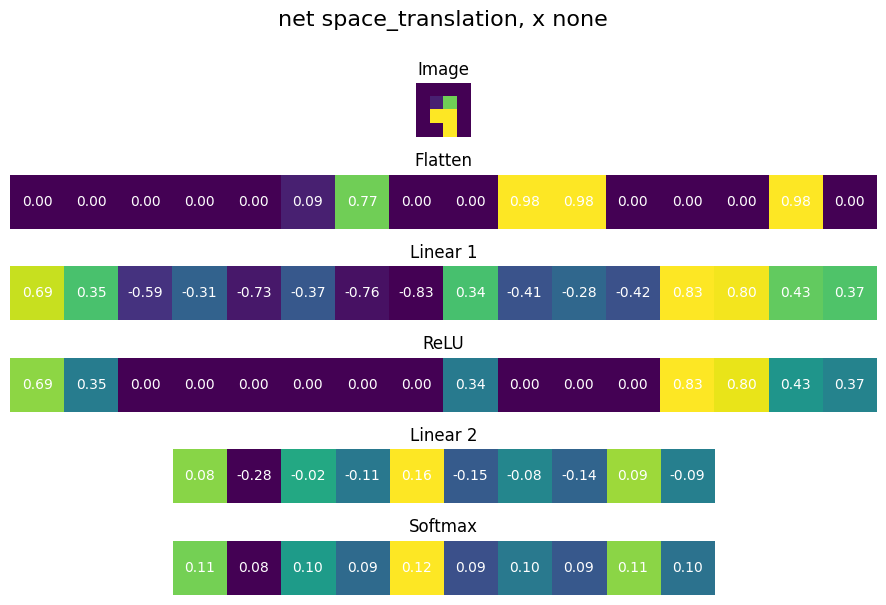

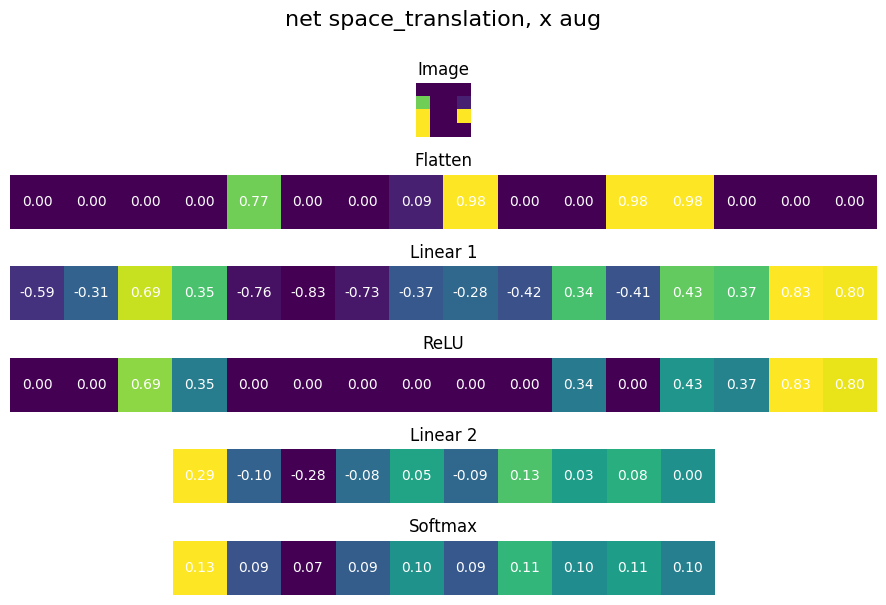

In [90]:
dim = args.dim
linearmodules = [MyLinear, nn.Linear]
set_bias = args.bias

transform_types = ['space_translation', 'none']


net1 = MLP(
    transform_type='none',
    space_length=dim, 
    linearmodules=linearmodules, 
    bias=set_bias
)
net2 = MLP(
    transform_type='space_translation',
    space_length=dim, 
    linearmodules=linearmodules, 
    bias=set_bias,
)

for module_i in [1, 3]:
    net2.mlp[module_i].bias   = net1.mlp[module_i].bias
    net2.mlp[module_i].weight = net1.mlp[module_i].weight


nets = {'net none': net1, 'net space_translation' : net2}
x_ins = {'x none': x, 'x aug' : x_aug}

for net, x_in in product(nets, x_ins):
# for net, x_in in zip(nets, x_ins):
    suptitle = f'{net}, {x_in}'

    net = nets[net]
    x_in = x_ins[x_in]

    x_in = x_in.unsqueeze(0)

    outs = []
    for i in range(len(net.mlp)+1):
        modules = net.mlp[:i]
        x_out = modules(x_in)
        if i == 0: x_out = x_out.squeeze(0)
        outs.append(x_out.detach())

    imshows(outs, rows = False, axis_off = True, 
        titles = ['Image', 'Flatten', 'Linear 1', 'ReLU', 'Linear 2', 'Softmax'],
        imshow_kwargs={'cmap': 'viridis'},
        text_vals = [0, 1, 1, 1, 1, 1],
        l = 2,
        suptitle = suptitle
    )

In [92]:
w_ids = {transform: transform_func(linear.out_features) for transform, transform_func in linear.transform_funcs.items()}
plot_w_ids(w_ids)

NameError: name 'linear' is not defined

In [93]:
x = torch.tensor([[0.7, 0.9], [0.1, 0.4]])
x_org = x.clone()

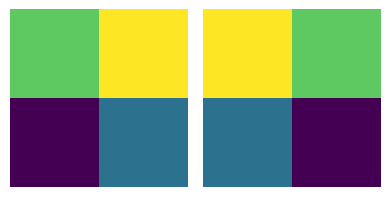

In [94]:
imshows([x, dataset.space_translation(x, shift = 1)], axis_off = True)


In [108]:
flatten = model.net.mlp[0]
linear  = model.net.mlp[1]
print(model.net)

assert linear.out_features == linear.in_features
size = linear.in_features
size = 4
linear = MyLinear(size, size, bias=linear.set_bias)

# simple_imshow(linear.weight.data)

MLP(
  (mlp): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): MyLinear()
    (2): ReLU()
    (3): Linear(in_features=16, out_features=10, bias=False)
    (4): Softmax(dim=1)
  )
)


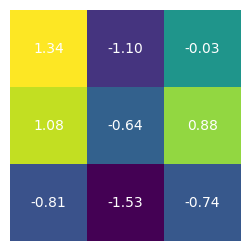

In [109]:
x = torch.tensor([[0.7, 0.9], [0.1, 0.4]])
x = torch.tensor([[0.7, 0.9, 0.1], [0.1, 0.4, 0.5], [0.3, 0.2, 0.8]])
x = torch.randn(3,3)

simple_imshow(x)

x_set = x.clone()

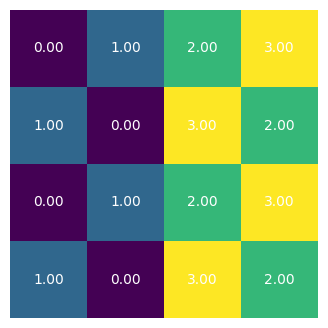

In [110]:
# size = 4
w_index = torch.tensor([[0, 1, 2, 3], [1, 0, 3, 2], [0, 1, 2, 3], [1, 0, 3, 2]])

# size = 9
w1 = torch.arange(size)
s1 = int(math.sqrt(size))
w2 = w1.reshape(s1, s1)

w_index = torch.cat([torch.stack([torch.roll(w2_i.repeat(s1), shifts = shift, dims = 0) for shift in range(s1)]) for w2_i in w2]).T

simple_imshow(w_index)

w_index_set = w_index.clone()

-1.02x-0.09 + -0.54x-0.24 + -1.49x-0.09 + 0.41x-0.24 =
0.09 + 0.13 + 0.14 + -0.10 =
0.27


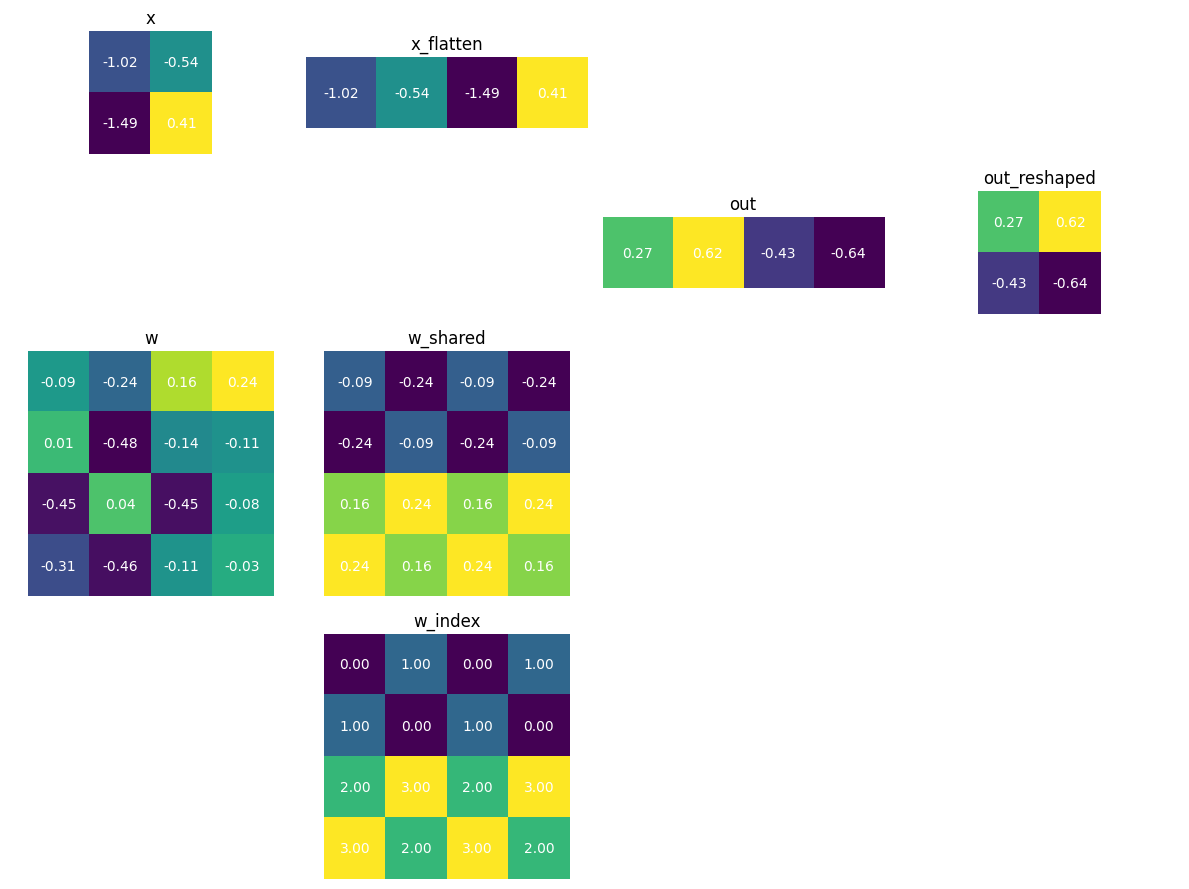

-0.54x-0.09 + -1.02x-0.24 + 0.41x-0.09 + -1.49x-0.24 =
0.05 + 0.24 + -0.04 + 0.36 =
0.62


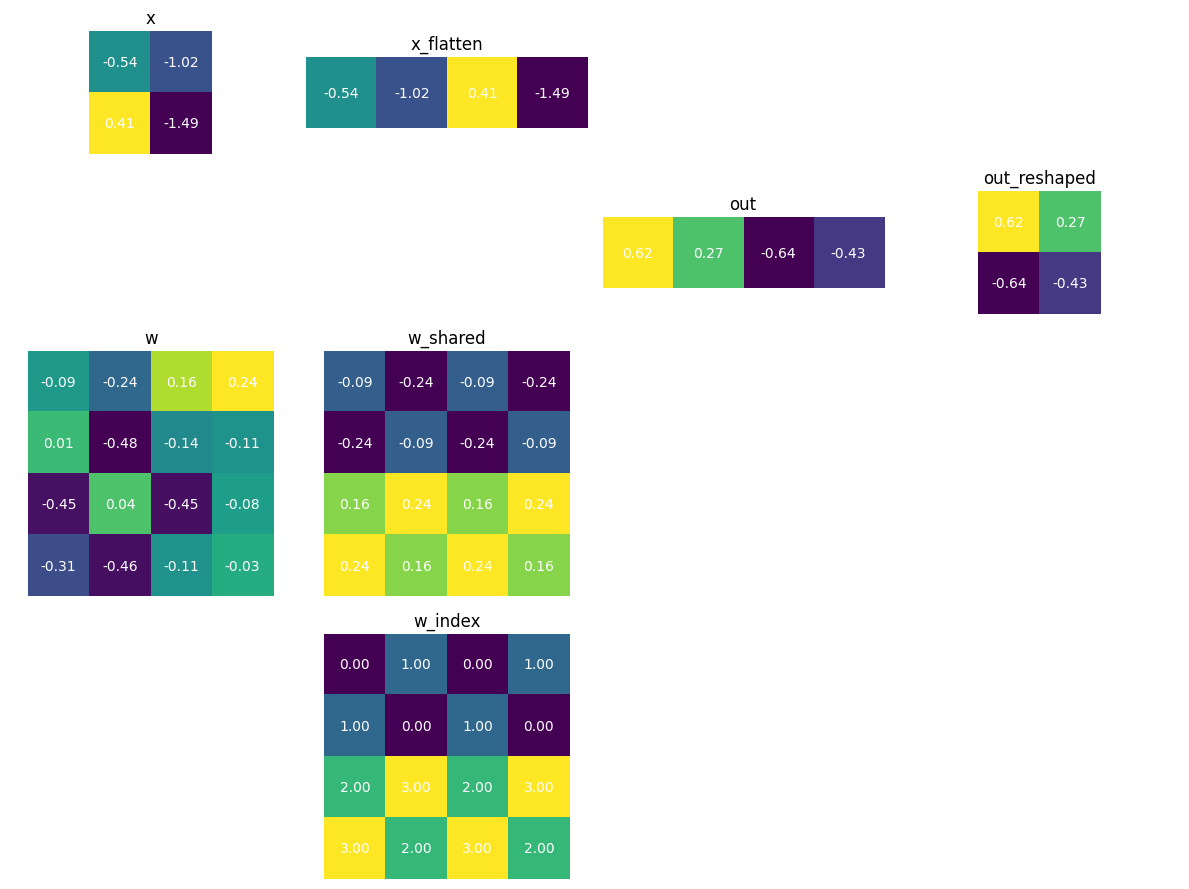

-1.02x-0.09 + -0.54x-0.24 + -1.49x-0.09 + 0.41x-0.24 =
0.09 + 0.13 + 0.14 + -0.10 =
0.27


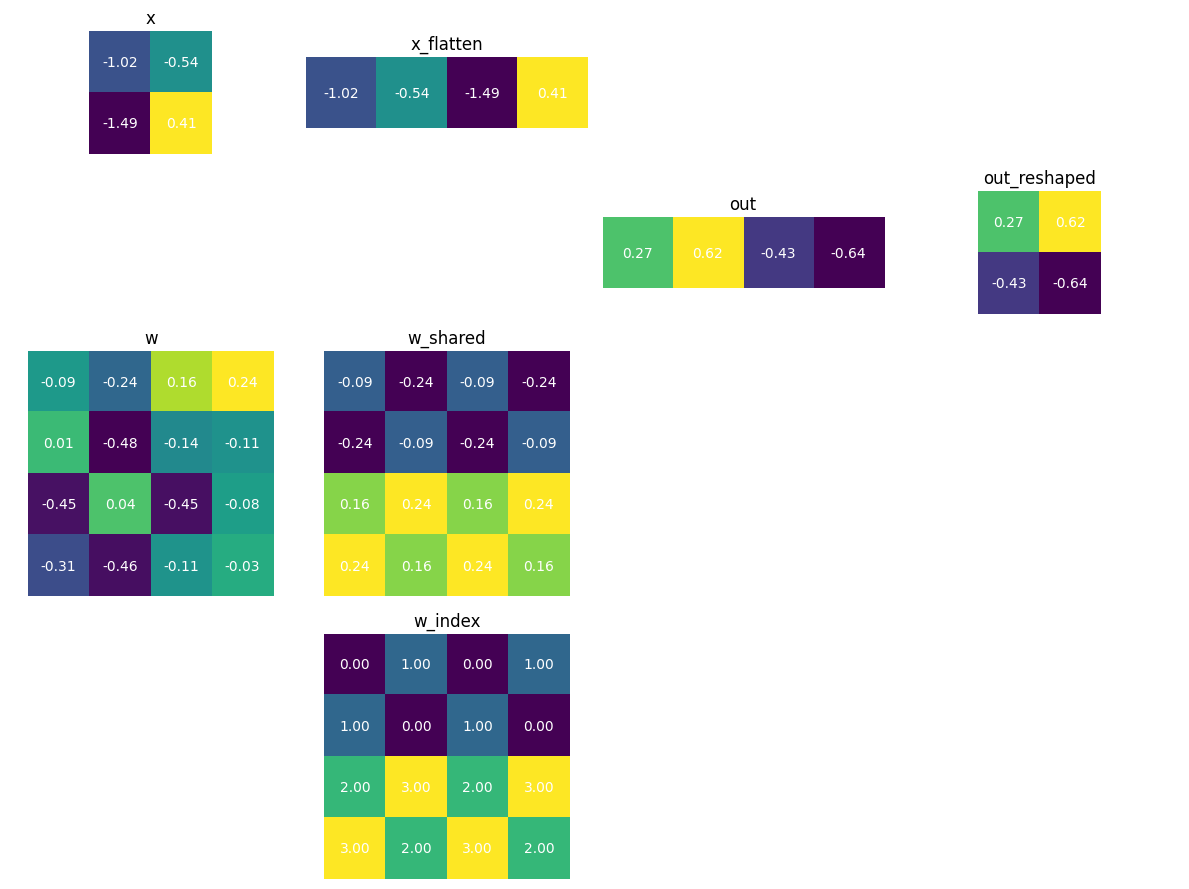

In [112]:
dim = 2
size = dim**2
linear = MyLinear(size, size, bias=linear.set_bias)
x_set = torch.randn(dim, dim)

plot_weights = True

l = 3
shift = 0
for shift in [0, 1, 2]:
    x = x_set.clone()
    x = dataset.space_translation(x, shift = shift)

    x_flatten = x.flatten().unsqueeze(0)
    w = linear.weight.data
    w_index = linear.get_w_index_space_translation(size)
    # w_index = w_index_set.clone()
    w_shared = w.flatten()[w_index.flatten()].reshape(w_index.shape)

    # out = x_flatten @ w_shared_dot
    out = linear(x_flatten, w_index = w_index).detach()
    out_reshaped = out.reshape(x.shape)

    x_is, w_is = torch.tensor([[x_i, w_i] for x_i, w_i in zip(x_flatten.squeeze(0), w_shared[0])]).T
    mults = [x_i*w_i for x_i, w_i in zip(x_is, w_is)]
    text = ' + '.join([f'{x_i:.2f}x{w_i:.2f}' for x_i, w_i in zip(x_is, w_is)]) + ' =\n' + ' + '.join([f'{mult:.2f}' for mult in mults]) + f' =\n{torch.sum(torch.tensor(mults)):.2f}'

    if plot_weights:
        fig, axs = plt.subplots(4, 4, figsize=np.array([4, 3])*l, tight_layout=True, gridspec_kw={'height_ratios': [1, 1, 2, 2], 'width_ratios': [1, 1, 1, 1]})
    else:
        fig, axs = plt.subplots(1, 4, figsize=np.array([4, 3])*l, tight_layout=True, gridspec_kw={'width_ratios': [1, 1, 1, 1]})

    ax = axs[0, 0] if plot_weights else axs[0]
    ax.imshow(x)
    ax.set_title('x')
    plot_vals(x, ax)

    ax = axs[0, 1] if plot_weights else axs[1]
    ax.imshow(x_flatten)
    ax.set_title('x_flatten')
    plot_vals(x_flatten, ax)

    if plot_weights:
        ax = axs[2, 0] 
        ax.imshow(w)
        ax.set_title('w')
        plot_vals(w, ax)

        ax = axs[3, 1]
        ax.imshow(w_index)
        ax.set_title('w_index')
        plot_vals(w_index, ax)

        ax = axs[2, 1]
        ax.imshow(w_shared)
        ax.set_title('w_shared')
        plot_vals(w_shared, ax)

    ax = axs[1, 2] if plot_weights else axs[2]
    ax.imshow(out)
    ax.set_title('out')
    plot_vals(out, ax)

    ax = axs[1, 3] if plot_weights else axs[3]
    ax.imshow(out_reshaped)
    ax.set_title('out_reshaped')
    plot_vals(out_reshaped, ax)

    # ax = axs[2, 2]
    # ax.text(-1, 0.5, text, ha='left', va='center', color='black', size = 10.)
    print(text)

    for ax in axs.flatten():
        ax.axis('off')

    plt.show()


In [109]:
dim = 3
size = dim**2

linear = MyLinear(size, size, bias=False, transform_type = 'space_translation')
x = torch.randn(1, size)

shift = 10

postprocess = lambda x: x.flatten()

def augment(x):
    x = x.reshape(dim, dim)
    x = dataset.space_translation(x, shift = shift)
    x = x.reshape(1, size)
    return x

def layer(x):
    x = linear(x)
    return x

def model_forward(x):
    
    model((x.unsqueeze(0), torch.tensor([-1])))

y1, y2 = assert_equiv(x, augment, layer, postprocess=postprocess, print_only = True)
y1 - y2

Equivariance test passed.


tensor([-5.9605e-08, -1.8626e-09, -2.9802e-08,  0.0000e+00, -1.1921e-07,
         0.0000e+00,  7.4506e-09,  5.9605e-08,  0.0000e+00],
       grad_fn=<SubBackward0>)

In [125]:
x, y = dataset[0]
x_aug, y_aug = dataset_aug[0]

# imshows([x, x_aug], axis_off = True, imshow_kwargs={'cmap': 'gray'})

In [123]:
y.unsqueeze(0)

tensor([4])

In [121]:
x.shape, y.shape

(torch.Size([28, 28]), torch.Size([]))

(tensor([[0.0830, 0.0886, 0.1140, 0.1114, 0.1249, 0.1013, 0.0984, 0.0960, 0.1072,
          0.0752]], grad_fn=<SoftmaxBackward0>),
 tensor([4]))

In [107]:
y1, y2

(tensor([ 0.0423,  0.0649, -0.1033,  0.1126,  0.0809, -0.1823,  0.3133, -0.1403,
         -0.1289], grad_fn=<ViewBackward0>),
 tensor([ 0.0423,  0.0649, -0.1033,  0.1126,  0.0809, -0.1823,  0.3133, -0.1403,
         -0.1289], grad_fn=<ViewBackward0>))

In [8]:
# x = flatten(imgs)[:1]
# w = linear.weight
# out = x @ w.T
# x.shape, w.shape, out.shape

(torch.Size([1, 784]), torch.Size([784, 784]), torch.Size([1, 784]))

In [ ]:
torch.tensor([
    0.1858 * -0.2304 + 0.1686 * -0.0586 + 0.1465 * -0.2031 + 0.2428 *  0.3317,
    0.1858 * -0.3947 + 0.1686 * -0.2305 + 0.1465 * -0.1412 + 0.2428 * -0.3006
])

In [ ]:
(x[0].reshape(-1, 1) * w.T).sum(dim=0)

In [ ]:
# weights = {}
# for name, param in model.named_parameters():
#     _, _, layer, wb = name.split('.')
#     key_name = f"{wb}_{layer}"
#     weights[key_name] = param.detach().view(-1).cpu().numpy()

# fig, axs = plt.subplots(1, len(weights), figsize=(15,5))

# for i, (name, vals) in enumerate(weights.items()):
#     ax = axs[i]
#     ax.hist(vals, bins=50)
#     ax.set_title(name)
#     ax.set_xlabel('weight value')
#     ax.set_ylabel('count')
# plt.show()

In [ ]:
label_preds = model.net(imgs).detach()
imgs, labels, label_preds = imgs.numpy(), labels.numpy(), label_preds.numpy()

In [ ]:
logscale = True

n_plots = len(imgs)

fig, axs = plt.subplots(n_plots, 2, figsize=(4, 2*n_plots), gridspec_kw={'width_ratios': [1, 1]}, tight_layout=True)

x = np.arange(10)

axs[0, 0].set_title('Images')
axs[0, 1].set_title('Predictions')

for i in range(n_plots):
    ax_img, ax_pred = axs[i, 0], axs[i, 1]
    
    ax_img.imshow(imgs[i], cmap='gray')
    ax_img.set_axis_off()

    ax_pred.bar(x, label_preds[i])
    ax_pred.axvline(labels[i], color='r')
    ax_pred.set_xticks(x)
    ax_pred.set_xticklabels(x)

    if logscale:
        ax_pred.set_yscale('log')
        ax_pred.set_ylim([label_preds.min()*0.9, np.min([label_preds.max()*1.1, 1])])
    else:
        ax_pred.set_ylim([0, 1])



plt.show()